In [1]:
from sklearn.datasets import fetch_openml
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch

c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
mnist = fetch_openml('mnist_784')

c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
x,y = mnist['data'],mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

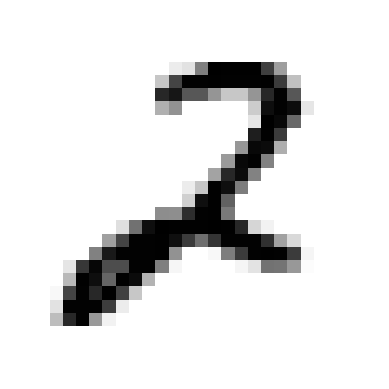

In [14]:
some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
x_train, x_test = x[:60000],x[60000:]

In [16]:
y_train,y_test = y[:60000],y[60000:]

In [17]:

y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

y_train_2 = y_train==2
y_test_2 = y_test==2

In [18]:
y_train_2

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC  


In [54]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train_2)
example = clf.predict([some_digit])
print(example)
print(clf.score(x_test,y_test_2))


c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[ True]
0.9885


In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train_2)
example_dt = clf.predict([some_digit])
print(dt.score(x_test,y_test_2))
print(example_dt)

0.9702
[ True]


c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [56]:
gbclf = GradientBoostingClassifier()
gbclf.fit(x_train,y_train_2)
example_gbclf = gbclf.predict([some_digit])
print(gbclf.score(x_test,y_test_2))
print(example_gbclf)

c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.9851
[ True]


In [57]:
lr = LogisticRegression()
lr.fit(x_train,y_train_2)
example_lr = lr.predict([some_digit])
print(lr.score(x_test,y_test_2))
print(example_lr)

0.9802
[ True]


c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [61]:
abclf = AdaBoostClassifier()
abclf.fit(x_train,y_train_2)
example_abclf =abclf.predict([some_digit])
print(abclf.score(x_test,y_test_2))
print(example_abclf) 

c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.9707
[ True]


In [62]:
xgbclf = XGBClassifier()
xgbclf.fit(x_train,y_train_2)
example_xgbclf =xgbclf.predict([some_digit])
print(xgbclf.score(x_test,y_test_2))
print(example_xgbclf) 

0.9942
[1]


In [63]:
svc = SVC()
svc.fit(x_train,y_train_2)
example_svc = svc.predict([some_digit])
print(svc.score(x_test,y_test_2))
print(example_svc) 

c:\Users\vinod\anaconda3\envs\pytorch\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9947
[ True]


In [64]:
from sklearn.model_selection import cross_val_score

a = cross_val_score(svc, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())

0.9937999999999999


In [65]:
a

array([0.994 , 0.9937, 0.9937])

In [22]:
train_data = datasets.MNIST(
    root='data',
    train = True,
    transform= ToTensor(),
    download=True
)

test_data = datasets.MNIST(
    root='data',
    train = False,
    transform= ToTensor(),
    download=True
)

In [23]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [24]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [25]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [26]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [27]:
train_data.targets.size()

torch.Size([60000])

In [28]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [29]:
loaders = {
    'train':DataLoader(train_data,
                       batch_size=120,
                       shuffle=True,
                       num_workers=1),

    'test':DataLoader(test_data,
                       batch_size=120,
                       shuffle=True,
                       num_workers=1) 
}

In [30]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [31]:
class Mnet(nn.Module):
    def __init__(self):
        super(Mnet,self).__init__()
        self.conv1=nn.Conv2d(1,10,kernel_size=5)
        self.conv2=nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)

    def forward(self,x):
        x =F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x,training=self.training)
        x = self.fc2(x)
        
        return F.softmax(x)

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Mnet().to(device)
optimizer = optim.Adam(model.parameters(),lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data,target) in enumerate(loaders['train']):
        data,target = data.to(device),target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss= loss_fn(output,target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx*len(data)}/{len(loaders["train"].dataset)} ({100 *  batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()
    test_loss=0
    correct=0

    with torch.no_grad():
        for data,target in loaders['test']:
            data,target = data.to(device), target.to(device)
            output = model(data)
            test_loss +=loss_fn(output,target).item()
            pred= output.argmax(dim=1,keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'n/ Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

In [33]:
for epoch in range(1,5):
    train(epoch)
    test()

C:\Users\vinod\AppData\Local\Temp\ipykernel_2296\1203378447.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.302708
Train Epoch: 1 [1200/60000 (2%)]	2.299161
Train Epoch: 1 [2400/60000 (4%)]	2.291858
Train Epoch: 1 [3600/60000 (6%)]	2.259159
Train Epoch: 1 [4800/60000 (8%)]	2.148603
Train Epoch: 1 [6000/60000 (10%)]	2.045941
Train Epoch: 1 [7200/60000 (12%)]	1.948210
Train Epoch: 1 [8400/60000 (14%)]	1.875971
Train Epoch: 1 [9600/60000 (16%)]	1.885118
Train Epoch: 1 [10800/60000 (18%)]	1.804145
Train Epoch: 1 [12000/60000 (20%)]	1.768639
Train Epoch: 1 [13200/60000 (22%)]	1.755316
Train Epoch: 1 [14400/60000 (24%)]	1.771452
Train Epoch: 1 [15600/60000 (26%)]	1.755649
Train Epoch: 1 [16800/60000 (28%)]	1.709368
Train Epoch: 1 [18000/60000 (30%)]	1.718523
Train Epoch: 1 [19200/60000 (32%)]	1.744325
Train Epoch: 1 [20400/60000 (34%)]	1.728251
Train Epoch: 1 [21600/60000 (36%)]	1.722542
Train Epoch: 1 [22800/60000 (38%)]	1.711924
Train Epoch: 1 [24000/60000 (40%)]	1.677057
Train Epoch: 1 [25200/60000 (42%)]	1.698696
Train Epoch: 1 [26400/60000 (44%)]	1.676040
Train

C:\Users\vinod\AppData\Local\Temp\ipykernel_2296\1203378447.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


prediction: 0


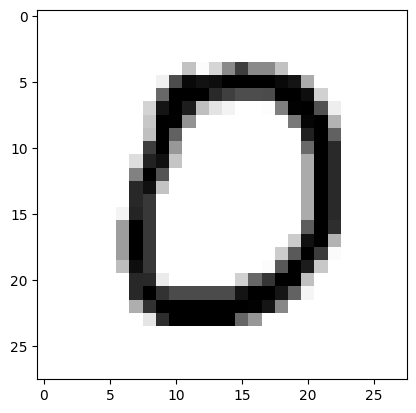

In [34]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[10]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'prediction: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image,cmap='binary')
plt.show()